# Giảm chiều Trực Quan Hóa: GloVe - PCA

In [15]:
import numpy as np

def load_glove_embeddings(file_path, limit=20000):
    embeddings = {}
    with open(file_path, 'r', encoding='utf8') as f:
        for i, line in enumerate(f):
            if i >= limit: 
                break
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=float)
            embeddings[word] = vector
    return embeddings

glove_path = r'E:\Nam4\NLP\glove.6B.50d.txt\glove.6B.50d.txt'
embeddings = load_glove_embeddings(glove_path)
print(f"Số lượng từ: {len(embeddings)}")


Số lượng từ: 20000


In [16]:
words = list(embeddings.keys())
X = np.array([embeddings[word] for word in words])
X.shape

(20000, 50)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

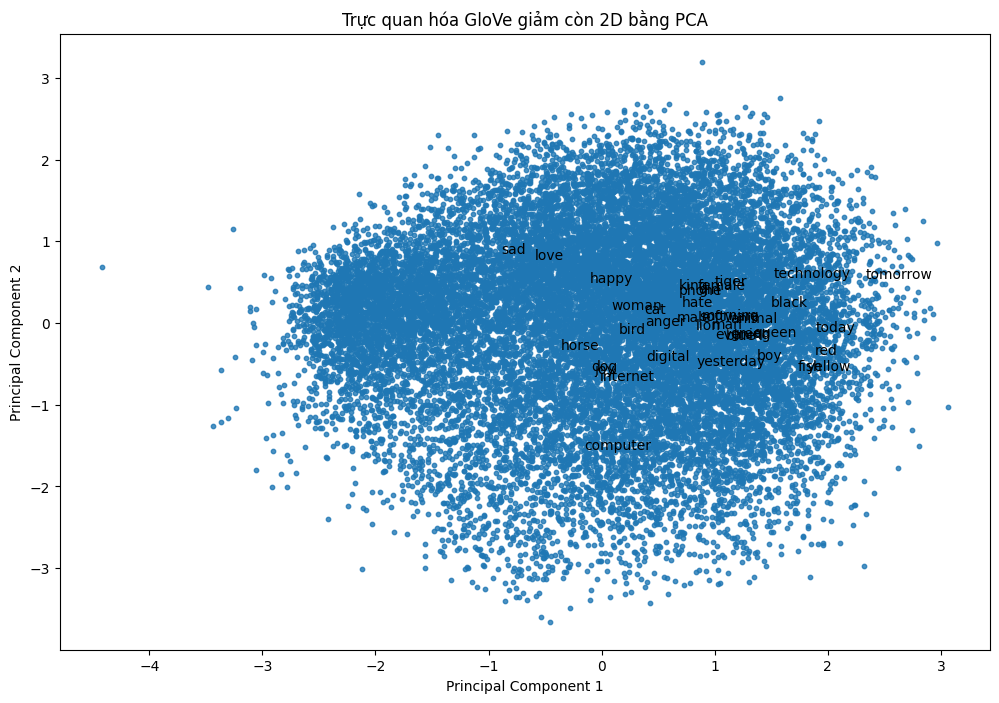

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.8)

highlight_words = ['man', 'woman', 'king', 'queen', 'boy', 'girl', 'male', 'female', 'cat', 'dog', 'animal', 'bird', 'fish', 'lion', 'tiger', 'horse', 'computer', 'phone', 'internet', 'software', 'technology', 'digital','happy', 'sad', 'love', 'hate', 'joy', 'anger', 'morning', 'evening', 'today', 'yesterday', 'tomorrow',
    'red', 'blue', 'green', 'yellow', 'black']

# hiển thị một vài từ
for i, word in enumerate(highlight_words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))
    

plt.title("Trực quan hóa GloVe giảm còn 2D bằng PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Nhận xét

Quan sát biểu đồ phân tán trên ta thấy các từ đồng nghĩa hoặc liên quan về nghĩa thường nằm gần nhau, một số nhóm từ dễ thấy như:
- sad, love, happy gần nhau, thể hiện PCA đã giữ phần nào mối quan hệ về cảm xúc.
- digital, internet nằm gần nhau, phản ánh nhóm từ liên quan công nghệ.
- hourse, bird, dog nằm gần nhau phản ánh nhóm từ về động vật
- các màu sắc như red, yellow, green, black cũng tập trung gần nhau, có thể do PCA giữ được nhóm từ liên quan về chủ đề...

Các từ nằm gần nhau phản ánh mối quan hệ ngữ nghĩa hoặc chủ đề chung, tuy nhiên, vì PCA là tuyến tính nó cố gắng giữ phương sai lớn nhất của dữ liệu nên một số mối quan hệ phi tuyến hoặc các nhóm nhỏ có thể bị dàn trải ra,  phân tán, không tạo thành cụm rõ ràng.